In [142]:
import numpy as np
# Read the data from the csv file
from pandas import read_csv

file_path = 'Australian Vehicle Prices.csv'
df = read_csv(file_path)
df.head()

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
0,Ssangyong,2022.0,Rexton,Sutherland Isuzu Ute,2022 Ssangyong Rexton Ultimate (awd),DEMO,Automatic,"4 cyl, 2.2 L",AWD,Diesel,8.7 L / 100 km,5595,White / Black,"Caringbah, NSW",4 cyl,SUV,4 Doors,7 Seats,51990
1,MG,2022.0,MG3,Hatchback,2022 MG MG3 Auto Excite (with Navigation),USED,Automatic,"4 cyl, 1.5 L",Front,Premium,6.7 L / 100 km,16,Black / Black,"Brookvale, NSW",4 cyl,Hatchback,5 Doors,5 Seats,19990
2,BMW,2022.0,430I,Coupe,2022 BMW 430I M Sport,USED,Automatic,"4 cyl, 2 L",Rear,Premium,6.6 L / 100 km,8472,Grey / White,"Sylvania, NSW",4 cyl,Coupe,2 Doors,4 Seats,108988
3,Mercedes-Benz,2011.0,E500,Coupe,2011 Mercedes-Benz E500 Elegance,USED,Automatic,"8 cyl, 5.5 L",Rear,Premium,11 L / 100 km,136517,White / Brown,"Mount Druitt, NSW",8 cyl,Coupe,2 Doors,4 Seats,32990
4,Renault,2022.0,Arkana,SUV,2022 Renault Arkana Intens,USED,Automatic,"4 cyl, 1.3 L",Front,Unleaded,6 L / 100 km,1035,Grey / Black,"Castle Hill, NSW",4 cyl,SUV,4 Doors,5 Seats,34990


In [143]:
num_entries = len(df)
print(f"Number of entries: {num_entries}")

Number of entries: 16734


In [144]:
# Check for missing values
df.isnull().sum()

Brand                   1
Year                    1
Model                   1
Car/Suv                28
Title                   1
UsedOrNew               1
Transmission            1
Engine                  1
DriveType               1
FuelType                1
FuelConsumption         1
Kilometres              1
ColourExtInt            1
Location              450
CylindersinEngine       1
BodyType              282
Doors                1604
Seats                1705
Price                   3
dtype: int64

In [145]:
# Drop rows with missing values in the 'Price' column since it is the target variable.
df = df.dropna(subset=['Price'])

# There are some entries that are not integers, including '-' and '- / -'
# Converet non NaN entries to numeric values.
from pandas import to_numeric

df['Kilometres'] = to_numeric(df['Kilometres'], errors='coerce')
df.isnull().sum()

Brand                   0
Year                    0
Model                   0
Car/Suv                27
Title                   0
UsedOrNew               0
Transmission            0
Engine                  0
DriveType               0
FuelType                0
FuelConsumption         0
Kilometres            591
ColourExtInt            0
Location              449
CylindersinEngine       0
BodyType              281
Doors                1602
Seats                1703
Price                   0
dtype: int64

In [146]:
# Handel all Numeric variables by extracting values and converting them to the correct data type

df['Price'] = to_numeric(df['Price'], errors='coerce')
df['Year'] = df['Year'].astype(int)
df['EngineL'] = df['Engine'].str.extract(r'(\d+\.?\d*) L', expand=False).astype('float32')
df['FuelConsumption'] = df['FuelConsumption'].str.extract(r'(\d+\.?\d*) L.*', expand=False).astype('float32')
df['CylindersinEngine'] = df['CylindersinEngine'].str.extract(r'(\d+) (?:cyl|L)', expand=False).astype('Int64')
df['Doors'] = df['Doors'].str.extract(r'(\d+) Doors', expand=False).astype('Int64')
df['Seats'] = df['Seats'].str.extract(r'(\d+) Seats', expand=False).astype('Int64')

In [147]:
# Introducing a new column 'Age' to know the age of the car
from datetime import date

date.today().year
df['CarAge']=date.today().year-df['Year']
df['CarAge'] = df['CarAge'].astype(int)
df.head()

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,...,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price,EngineL,CarAge
0,Ssangyong,2022,Rexton,Sutherland Isuzu Ute,2022 Ssangyong Rexton Ultimate (awd),DEMO,Automatic,"4 cyl, 2.2 L",AWD,Diesel,...,5595.0,White / Black,"Caringbah, NSW",4,SUV,4,7,51990.0,2.2,2
1,MG,2022,MG3,Hatchback,2022 MG MG3 Auto Excite (with Navigation),USED,Automatic,"4 cyl, 1.5 L",Front,Premium,...,16.0,Black / Black,"Brookvale, NSW",4,Hatchback,5,5,19990.0,1.5,2
2,BMW,2022,430I,Coupe,2022 BMW 430I M Sport,USED,Automatic,"4 cyl, 2 L",Rear,Premium,...,8472.0,Grey / White,"Sylvania, NSW",4,Coupe,2,4,108988.0,2.0,2
3,Mercedes-Benz,2011,E500,Coupe,2011 Mercedes-Benz E500 Elegance,USED,Automatic,"8 cyl, 5.5 L",Rear,Premium,...,136517.0,White / Brown,"Mount Druitt, NSW",8,Coupe,2,4,32990.0,5.5,13
4,Renault,2022,Arkana,SUV,2022 Renault Arkana Intens,USED,Automatic,"4 cyl, 1.3 L",Front,Unleaded,...,1035.0,Grey / Black,"Castle Hill, NSW",4,SUV,4,5,34990.0,1.3,2


In [148]:
df.isnull().sum()

Brand                   0
Year                    0
Model                   0
Car/Suv                27
Title                   0
UsedOrNew               0
Transmission            0
Engine                  0
DriveType               0
FuelType                0
FuelConsumption      1696
Kilometres            591
ColourExtInt            0
Location              449
CylindersinEngine    1673
BodyType              281
Doors                1673
Seats                1703
Price                  50
EngineL              1674
CarAge                  0
dtype: int64

In [149]:
# Removing rows with NaN values
def delete_rows_with_nan(df):
    """
    Deletes all rows from the given DataFrame that contain any NaN values.

    Parameters:
    - df: pandas.DataFrame

    Returns:
    - A new DataFrame with rows containing any NaN values removed.
    """
    # Drop rows with any NaN values
    clean_df = df.dropna()
    
    return clean_df

df = delete_rows_with_nan(df)
df.isnull().sum()

Brand                0
Year                 0
Model                0
Car/Suv              0
Title                0
UsedOrNew            0
Transmission         0
Engine               0
DriveType            0
FuelType             0
FuelConsumption      0
Kilometres           0
ColourExtInt         0
Location             0
CylindersinEngine    0
BodyType             0
Doors                0
Seats                0
Price                0
EngineL              0
CarAge               0
dtype: int64

In [150]:
num_entries = len(df)
print(f"Number of entries: {num_entries}")

Number of entries: 14453


In [151]:
df.describe()

,Year,FuelConsumption,Kilometres,CylindersinEngine,Doors,Seats,Price,EngineL,CarAge
count,14453.000000,14453.000000,14453.000000,14453.0,14453.0,14453.0,14453.000000,14453.000000,14453.000000
mean,2016.185083,7.738456,100103.632256,4.424064,4.022417,5.121705,34892.160036,2.395185,7.814917
std,4.905274,2.212913,78138.646786,1.103987,0.671302,1.087728,29052.898637,0.885875,4.905274
min,1978.000000,0.000000,1.000000,0.0,2.0,2.0,88.000000,0.000000,1.000000
25%,2013.000000,6.600000,41095.000000,4.0,4.0,5.0,18990.000000,2.000000,4.000000
50%,2017.000000,7.600000,85065.000000,4.0,4.0,5.0,28990.000000,2.200000,7.000000
75%,2020.000000,8.800000,146720.000000,4.0,4.0,5.0,42288.000000,2.800000,11.000000
max,2023.000000,27.000000,526162.000000,12.0,5.0,22.0,649880.000000,7.300000,46.000000


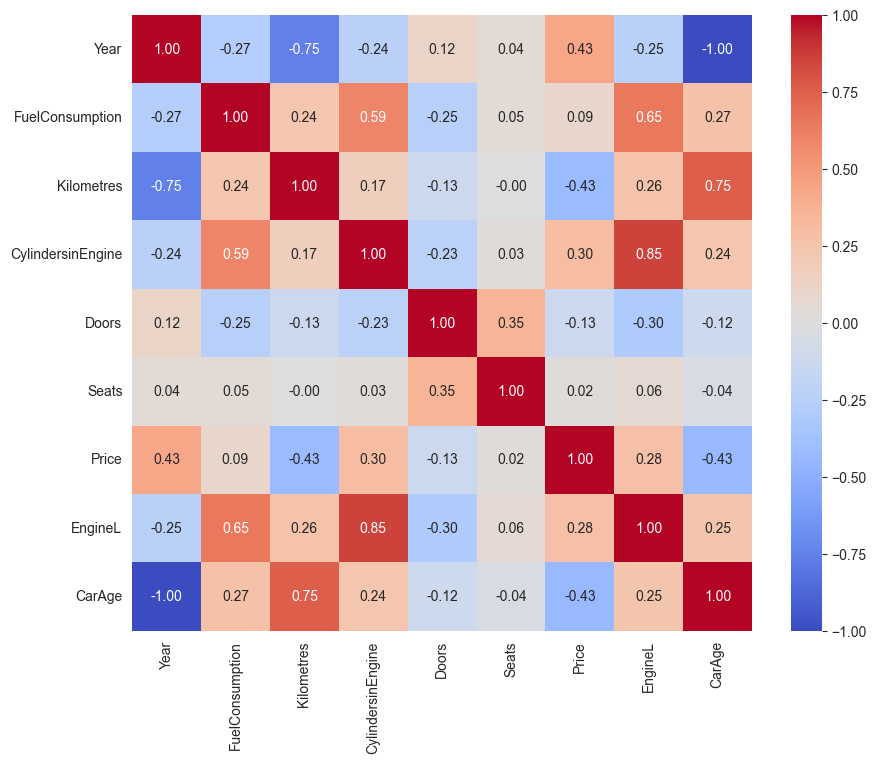

In [152]:
from seaborn import heatmap
from matplotlib.pyplot import figure, show

# Select only numerical columns from the DataFrame
numerical_df = df.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = numerical_df.corr()

# Create a heatmap of the correlation matrix
figure(figsize=(10, 8))
heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
show()

In [153]:
df.nunique()

Brand                   64
Year                    39
Model                  645
Car/Suv                228
Title                 7073
UsedOrNew                3
Transmission             3
Engine                  90
DriveType                5
FuelType                 8
FuelConsumption        152
Kilometres           12969
ColourExtInt           705
Location               593
CylindersinEngine        9
BodyType                10
Doors                    4
Seats                   12
Price                 3172
EngineL                 59
CarAge                  39
dtype: int64

In [154]:
# Select only non-numeric columns from the DataFrame
non_numeric_df = df.select_dtypes(exclude=['number'])

# Iterate through each non-numeric column and print its unique values
for column in non_numeric_df.columns:
    print(f"Unique values in '{column}':")
    print(non_numeric_df[column].unique())
    print("\n")  # Print a newline for better readability between columns


Unique values in 'Brand':
['Ssangyong' 'MG' 'BMW' 'Mercedes-Benz' 'Renault' 'Land' 'Nissan' 'Toyota'
 'Honda' 'Volkswagen' 'Ford' 'Mitsubishi' 'Subaru' 'Hyundai' 'Jeep'
 'Volvo' 'Mazda' 'Abarth' 'Holden' 'Audi' 'Kia' 'Mini' 'Suzuki' 'Porsche'
 'Peugeot' 'Isuzu' 'Lexus' 'Jaguar' 'Rolls-Royce' 'Skoda' 'Fiat' 'Haval'
 'Citroen' 'LDV' 'HSV' 'Foton' 'Mahindra' 'Maserati' 'GWM' 'Ram' 'Tesla'
 'Alfa' 'Genesis' 'Dodge' 'Chrysler' 'Great' 'Opel' 'Bentley' 'Ferrari'
 'Cupra' 'Chevrolet' 'Lamborghini' 'FPV' 'McLaren' 'Iveco' 'Infiniti'
 'BYD' 'Chery' 'Tata' 'Aston' 'Daewoo' 'Saab' 'Proton' 'Smart']


Unique values in 'Model':
['Rexton' 'MG3' '430I' 'E500' 'Arkana' 'Rover' 'Pulsar' '86' 'Jazz'
 'HiAce' 'Golf' 'X3' '118D' 'Fiesta' 'Outlander' 'Amarok' 'Outback'
 'Mirage' 'Camry' 'I45' 'Territory' 'Qashqai' 'Tucson' 'Focus' 'X-Trail'
 'Corolla' 'Yaris' 'Patriot' 'S60' 'Triton' 'E250' 'A250' 'CX-5' 'Falcon'
 '595' 'CR-V' 'I30' '6' 'Kluger' 'Santa' 'Cascada' 'ML320' 'Lancer' 'A5'
 'RIO' 'Cherokee' 'Ti

In [155]:
# Remove the columns 'Location', 'ColourExtInt', 'Engine', and 'Title' Since they do not seem to be able to add any value to the model
df = df.drop(columns=['Location', 'ColourExtInt', 'Engine', 'Title'])

# Columns to convert to categorical
categorical_columns = ['Brand', 'Model', 'Car/Suv', 'UsedOrNew', 'Transmission', 'DriveType', 'FuelType', 'BodyType']

# Convert specified columns to categorical
for column in categorical_columns:
    df[column] = df[column].astype('category')

# Verify changes
print(df.dtypes)


Brand                category
Year                    int32
Model                category
Car/Suv              category
UsedOrNew            category
Transmission         category
DriveType            category
FuelType             category
FuelConsumption       float32
Kilometres            float64
CylindersinEngine       Int64
BodyType             category
Doors                   Int64
Seats                   Int64
Price                 float64
EngineL               float32
CarAge                  int32
dtype: object


In [156]:
# Replace '-' with NaN 
df['FuelType'] = df['FuelType'].replace('-', np.nan)
df['Transmission'] = df['Transmission'].replace('-', np.nan)

df.isnull().sum()

Brand                  0
Year                   0
Model                  0
Car/Suv                0
UsedOrNew              0
Transmission          30
DriveType              0
FuelType             144
FuelConsumption        0
Kilometres             0
CylindersinEngine      0
BodyType               0
Doors                  0
Seats                  0
Price                  0
EngineL                0
CarAge                 0
dtype: int64

In [157]:
df = delete_rows_with_nan(df)
num_entries = len(df)
print(f"Number of entries: {num_entries}")

Number of entries: 14283
